In [2]:
import pandas as pd
import numpy as np

# Generate synthetic data
dates = pd.date_range(start="2022-01-01", end="2022-12-31", freq="D")
regions = ['North', 'South', 'East', 'West']
categories = ['Electronics', 'Clothing', 'Home & Kitchen']

np.random.seed(42)
data = {
"Date": np.random.choice(dates, 500),
"Region": np.random.choice(regions, 500),
"Product_Category": np.random.choice(categories, 500),
"Sales": np.random.randint(100, 5000, 500),
"Profit": np.random.randint(50, 2500, 500),
"Discount": np.random.choice([0, 5, 10], 500)
}

df = pd.DataFrame(data)

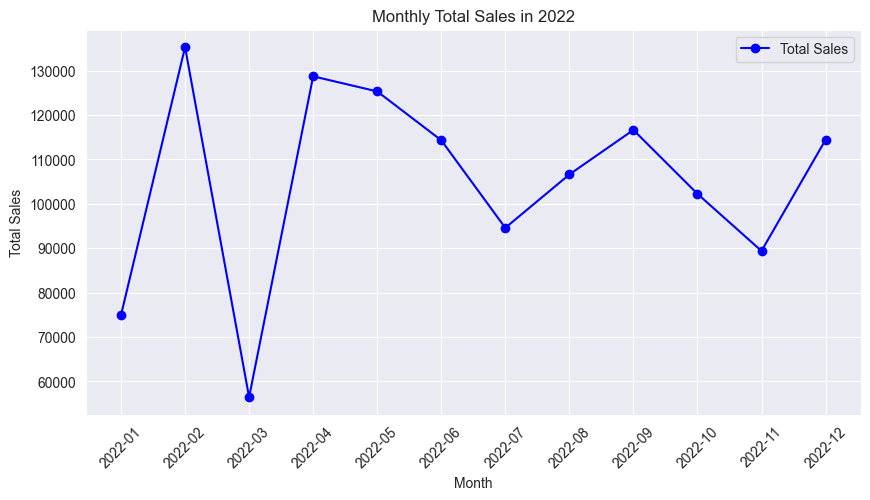

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Sales"].sum()

sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))

plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker="o", linestyle="-", color="b", label="Total Sales")

plt.title("Monthly Total Sales in 2022")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

C:\Users\omar\AppData\Local\Temp\ipykernel_3324\3958513254.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Product_Category", y="Profit", data=category_profit, palette="viridis")


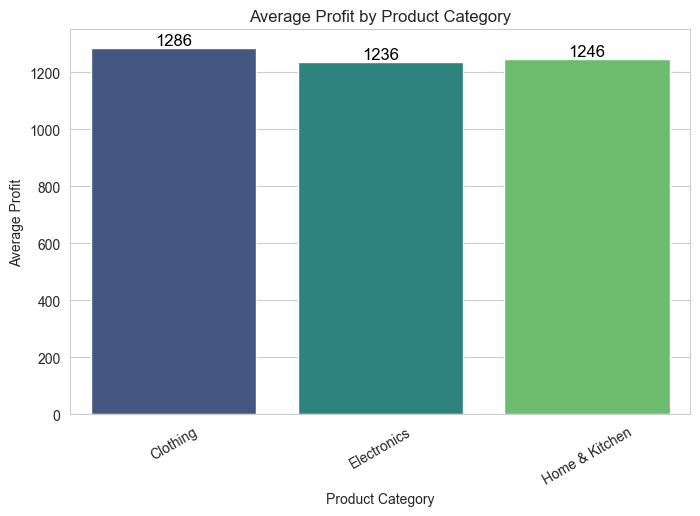

In [4]:
category_profit = df.groupby("Product_Category")["Profit"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ax = sns.barplot(x="Product_Category", y="Profit", data=category_profit, palette="viridis")

plt.title("Average Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Profit")
plt.xticks(rotation=30)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.show()

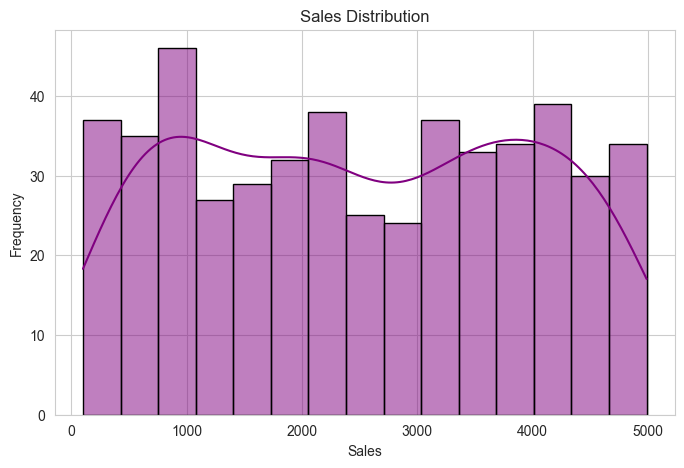

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Sales"], bins=15, kde=True, color="purple", edgecolor="black")

plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.grid(True)

plt.show()

C:\Users\omar\AppData\Local\Temp\ipykernel_3324\3372109610.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Region", y="Sales", data=df, palette="pastel")


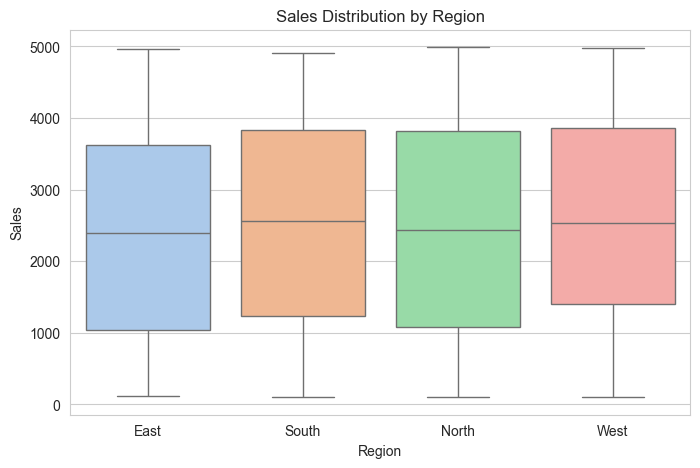

In [6]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

sns.boxplot(x="Region", y="Sales", data=df, palette="pastel")

plt.title("Sales Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Sales")

plt.show()

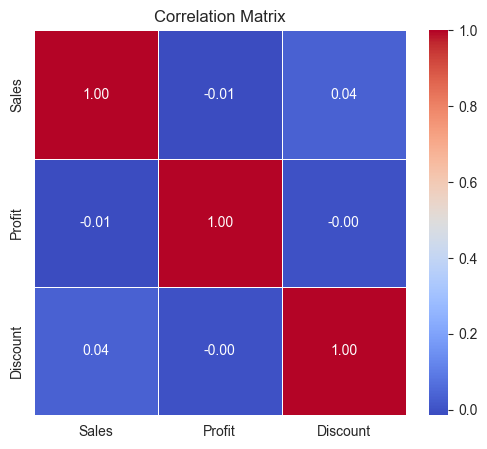

In [7]:
plt.figure(figsize=(6, 5))

correlation_matrix = df[["Sales", "Profit", "Discount"]].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix")

plt.show()